# Task 5. Algorithms on graphs. Introduction to graphs and basic algorithms on graphs

Goal

The use of different representations of graphs and basic algorithms on graphs (Depth-first search and Breadth-first search)


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random

# Task I

I. Generate a random adjacency matrix for a simple undirected unweighted graph with 100 vertices and 200 edges (note that the matrix should be symmetric and contain only 0s and 1s as elements). Transfer the matrix into an adjacency list. Visualize the graph and print several rows of the adjacency matrix and the adjacency list. Which purposes is each representation more convenient for?

In [2]:
# Generate a random adjacency matrix for a simple undirected unweighted graph with 100 vertices and 200 edges 
# (note that the matrix should be symmetric and contain only 0s and 1s as elements)

np.random.seed(4)

def generate_adjacency_matrix(vertices, edges):
    matrix = np.zeros((vertices, vertices), dtype=int)
    added_edges = 0
    
    while added_edges < edges:
        # Randomly select two distinct vertices
        v1, v2 = np.random.choice(vertices, 2, replace=False)
        
        # If there isn't already an edge between them -- add
        if matrix[v1, v2] == 0:
            matrix[v1, v2] = 1
            matrix[v2, v1] = 1 
            added_edges += 1
    
    return matrix

adj_matrix = generate_adjacency_matrix(100, 200)

In [3]:
#Check
adj_matrix.shape

(100, 100)

In [4]:
#Check
np.sum(adj_matrix)
#400 means 200 edges

400

In [5]:
# Transfer the Matrix into an Adjacency List
# The adjacency list is a representation where each vertex is associated with a list of its neighboring vertices.

def matrix_to_adj_list(matrix):
    return {i: list(np.where(row==1)[0]) for i, row in enumerate(matrix)}

adj_list = matrix_to_adj_list(adj_matrix)

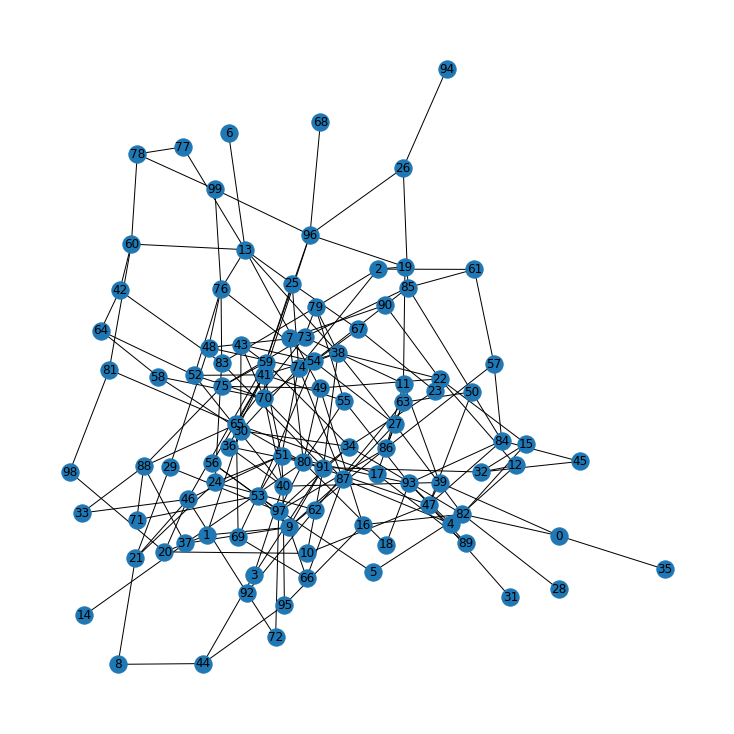

In [6]:
# Visualize the Graph

def visualize_graph(adj_list):
    G = nx.Graph(adj_list)
    plt.figure(figsize=(10, 10))
    nx.draw(G, with_labels=True)
    plt.show()

visualize_graph(adj_list)

In [7]:
# Print first 5 rows of the adjacency matrix
print(' --- First 5 adjacency matrix rows ---')
for row in adj_matrix[:5]:
    print(row)

# Print first 5 entries of the adjacency list
print(' ')
print(' --- First 5 adjacency list rows ---')
for key, value in list(adj_list.items())[:5]:
    print(f"{key} --> {value}")

 --- First 5 adjacency matrix rows ---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Convenience of Representations:

Adjacency Matrix:
Good for checking if a specific edge (i, j) exists in constant time.
Consumes more memory, especially for sparse graphs.
Straightforward for matrix operations, such as computing powers of the adjacency matrix to determine the number of paths of a given length between two vertices.

Adjacency List:
More space-efficient for sparse graphs.
Directly enumerates neighbors, making it faster for algorithms like DFS and BFS.
Generally preferred for graph traversal algorithms.

# Task II

Use Depth-first search to find connected components of the graph and Breadth- first search to find a shortest path between two random vertices. 

Analyse the results obtained.

In [8]:
#DFS
def dfs(graph, start, visited):
    visited[start] = True
    component = [start]
    
    for neighbor in graph[start]:
        if not visited[neighbor]:
            component.extend(dfs(graph, neighbor, visited))
    
    return component

def connected_components(graph):
    visited = [False] * len(graph)
    components = []
    
    for vertex in range(len(graph)):
        if not visited[vertex]:
            components.append(dfs(graph, vertex, visited))
    
    return components

In [9]:
# It happens that all vertices are connected, can try diffent np.random.seed()
def analyze_graph(graph):
    components = connected_components(graph)

    components.sort(key=len, reverse=True)

    num_connected = len(components[0]) if components else 0
    num_unconnected = sum(1 for component in components if len(component) == 1)

    print(f"Total number of connected vertices: {num_connected}")
    print(f"Total number of unconnected vertices: {num_unconnected}")
    print(f"Components of the current graph:\n{components}")

analyze_graph(adj_list)


Total number of connected vertices: 100
Total number of unconnected vertices: 0
Components of the current graph:
[[0, 35, 39, 11, 73, 48, 29, 21, 8, 44, 3, 40, 36, 41, 38, 13, 6, 25, 59, 34, 23, 67, 70, 43, 30, 1, 9, 37, 14, 80, 7, 90, 22, 12, 4, 87, 27, 54, 53, 5, 82, 15, 32, 45, 84, 47, 10, 20, 46, 33, 88, 65, 17, 63, 19, 2, 61, 57, 86, 97, 56, 72, 92, 62, 24, 51, 74, 91, 83, 42, 60, 78, 77, 99, 76, 52, 64, 58, 96, 26, 85, 50, 94, 68, 81, 98, 79, 55, 93, 18, 89, 69, 66, 71, 75, 49, 16, 95, 31, 28]]


In [10]:
#BFS
def bfs_shortest_path(graph, start, end):
    visited = [False] * len(graph)
    queue = [(start, [start])]
    
    while queue:
        (vertex, path) = queue.pop(0)
        if vertex == end:
            return path
        
        for neighbor in graph[vertex]:
            if not visited[neighbor]:
                visited[neighbor] = True
                queue.append((neighbor, path + [neighbor]))
                
    return None  # Or no path found

def print_path_and_neighbors(graph, path):
    if not path:
        print("No path found")
        return

    print(f"The founded shortest way is: {path}")
    print("Let's print the founded way from {} to {}".format(path[0], path[-1]))

    for vertex in path[:-1]:
        print(f"{vertex} -> {graph[vertex]}")
    print(f"{path[-1]} -> {graph[path[-1]]}")

In [11]:
# Connected components and shortest path

components = connected_components(adj_list)
print(f"Connected Components: {components}")

# Select two random vertices
print(' ')
v1, v2 = np.random.choice(100, 2, replace=False)
path = bfs_shortest_path(adj_list, v1, v2)
print(f"Random start: {v1}, random end: {v2}")
print_path_and_neighbors(adj_list, path)


Connected Components: [[0, 35, 39, 11, 73, 48, 29, 21, 8, 44, 3, 40, 36, 41, 38, 13, 6, 25, 59, 34, 23, 67, 70, 43, 30, 1, 9, 37, 14, 80, 7, 90, 22, 12, 4, 87, 27, 54, 53, 5, 82, 15, 32, 45, 84, 47, 10, 20, 46, 33, 88, 65, 17, 63, 19, 2, 61, 57, 86, 97, 56, 72, 92, 62, 24, 51, 74, 91, 83, 42, 60, 78, 77, 99, 76, 52, 64, 58, 96, 26, 85, 50, 94, 68, 81, 98, 79, 55, 93, 18, 89, 69, 66, 71, 75, 49, 16, 95, 31, 28]]
 
Random start: 65, random end: 58
The founded shortest way is: [65, 41, 52, 64, 58]
Let's print the founded way from 65 to 58
65 -> [17, 41, 69, 73, 80, 81, 88]
41 -> [36, 38, 51, 52, 55, 56, 65, 96]
52 -> [40, 41, 64, 70, 76]
64 -> [42, 52, 58]
58 -> [30, 64, 70]


DFS and Connected Components:

The results give us the different connected subgraphs within the larger graph. Each component is a set of vertices where there's a path between every pair of vertices.

If you only get one component for the entire graph, it means the graph is fully connected. Multiple components indicate isolated subgraphs.

This can be useful for analyzing disconnected parts of a network, understanding cluster structures, etc.


BFS and Shortest Path:

The shortest path function gives us the path between two vertices with the fewest edges.

If the function returns None, it means there's no path connecting the two vertices.

Knowing the shortest path is vital in various applications, including routing, social network analysis, etc.

Remember that for very dense or large graphs, these algorithms can take longer to run, but in our setup with 100 vertices and 200 edges, they should run pretty efficiently.

# Task III

Describe the data structures and design techniques used within the algorithms.

1. Depth-First Search (DFS) for Finding Connected Components:
Data Structures:

Graph Representation: An adjacency list is used to store the graph, which is a dictionary where the keys are vertex identifiers and the values are lists of neighboring vertices.
Visited List: A list of boolean values indicating whether a vertex has been visited. It is used to avoid processing a vertex more than once.
Components List: A list of lists, each inner list represents a connected component and contains vertices belonging to that component.
Design Techniques:

Recursion: DFS is implemented using recursion to explore as far down a branch as possible before backtracking.
Graph Traversal: DFS explores the graph, moving to adjacent unvisited vertices, marking them as visited, and recursively exploring further.
Algorithm Insights:

Connectivity: The DFS explores all reachable vertices from a starting point, so it can identify a connected component.
Backtracking: When DFS hits a dead end (i.e., no further unvisited neighbors), it backtracks, finding alternate paths to explore.

2. Breadth-First Search (BFS) for Finding the Shortest Path:
Data Structures:

Graph Representation: Similarly, an adjacency list is used, offering efficient retrieval of neighboring vertices.
Visited List: A list of boolean values that helps in avoiding revisiting and processing a vertex multiple times.
Queue: A list of tuples, where each tuple contains a vertex and the path taken to reach it. The queue ensures vertices are processed in the order they are discovered.
Design Techniques:

Queue Management: Vertices are processed in FIFO (First-In-First-Out) order, which ensures level-wise traversal in the graph.
Graph Traversal: BFS navigates through the graph level by level, exploring all neighbors of a vertex before moving on to the next level.
Path Tracking: Along with the vertex, the path taken to reach that vertex is stored and updated in the queue, providing a way to reconstruct the shortest path once the target vertex is reached.
Algorithm Insights:

Level Order Traversal: Since BFS processes vertices level by level, once it reaches the destination vertex, it ensures the path taken is the shortest.
Path Finding: BFS is ideal for unweighted graphs for finding the shortest path, as it naturally explores the minimal path by exploring all neighbors before proceeding to the next level.

Comparative Analysis:

Memory Usage:

DFS: Can be more memory-efficient on sparse graphs due to its recursive nature and typically lower overhead.
BFS: Can be memory-intensive, especially on dense graphs, due to storing all adjacent vertices in the queue.
Path-Finding:
DFS: Not suitable for finding the shortest path in an unweighted graph because it explores as far as possible along a branch before backtracking.
BFS: Naturally finds the shortest path in unweighted graphs due to its level-wise exploration.
Connected Components:
Both DFS and BFS can be used to find connected components, but DFS might be preferred for its simplicity and lower overhead in typical scenarios.
Both algorithms are fundamental to graph theory and find utility in various applications, choosing between them hinges on the specific use case, graph type (sparse/dense), and potential memory usage.